<a href="https://colab.research.google.com/github/BankNatchapol/ML-Algorithm/blob/master/Basic_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Logistic Regression**
---
ถ้าพูดถึงการทำ classification แล้ว algorithm แรกๆที่นึกถึงก็คงหนีไม่พ้น Logistic Regression ซึ่งเป็น algorithm แรกๆในการเรียนรู้ โดย idea ของ Logistic Regression นั้นมาจากเมื่อข้อมูลของเรานั้นมี target เป็น 0,1 หรือ เป็น yes,no แล้วทำไมในการทำ classification เราถึงไม่ใช้ Linear Regression ล่ะ เราลองมาดูกันครับ

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

เมื่อหน้าตาของข้อมูลเป็นแบบนี้

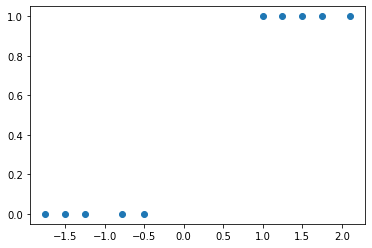

In [441]:
x = np.array([[1,1.5,1.25,2.1,1.75,-0.5,-0.78,-1.25,-1.5,-1.75]]).reshape(10,1) # input data
y = np.array([[1,1,1,1,1,0,0,0,0,0]]).reshape(10,1) # target
plt.scatter(x,y);

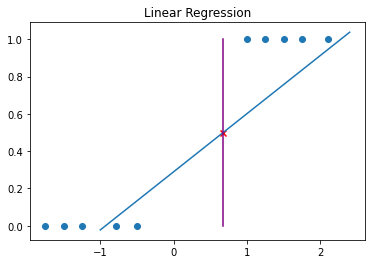

In [442]:
#@title Linear Regression Plot
def LR(x,y,a,b):
  def costFunction(s0,s1,m): # Function that return cost 
    diff = s0 + s1*x - y
    summa = sum(map(lambda x:x**2,diff))
    return (1/(2*m))*summa

  s0 = 0
  s1 = 0
  alpha = 0.001 # learning rate
  m = len(x)
  dif = s0 + s1*x-  y
  gradient0 = sum(dif)/m
  gradient1 = sum(dif*x)/m
  costLog = []
  for i in range(1000): # Learning
    diff = s0 + s1*x - y
    gradient0 = sum(diff)/m
    gradient1 = sum(diff*x)/m
    s0 = s0 - alpha*gradient0
    s1 = s1 - alpha*gradient1
    costLog.append(costFunction(s0,s1,m))
  para = np.array([[s0,s1]]).T
  domain = np.array([[1]*int(abs(a*10)+b*10),np.arange(a,b,0.1)]).T
  result = np.dot(domain[:int(abs(a*10)+b*10)],para)
  plt.scatter(x,y)
  plt.plot(np.arange(a,b,0.1),result.reshape(int(abs(a*10)+b*10),1))
  plt.title('Linear Regression');
  plt.scatter((0.5-s0)/s1,0.5,marker='x',c='red');
  plt.plot([(0.5-s0)/s1,(0.5-s0)/s1],[0,1],'purple');
  return para
para = LR(x,y,-1,2.5);

ซึ่งดูเหมือนว่า Linear Regression จะใช้ได้ เพราะ ถ้าเรากำหนดว่า $ x>\theta_0+\theta_10.5 $ ให้เป็น y=1<br>หรือก็คือ <br>
$h_{\theta}	\geqslant0.5: y=1$<br>
$h_{\theta}<0.5: y=0$<br> 
ผลลัพท์ที่ได้ก็มีความแม่นยำพอสมควร

In [443]:
#@title Target compare with Predicted 
domain = np.array([[1]*len(x),x.T[0]]).T
result = np.dot(domain,para)
result = result.reshape(10,1)
result = np.array([list(map(int,result>0.5))])
pd.DataFrame({'Data':x.T[0],'Target':y.T[0],'Predicted':result[0]})

,Data,Target,Predicted
0,1.00,1,1
1,1.50,1,1
2,1.25,1,1
3,2.10,1,1
4,1.75,1,1
5,-0.50,0,0
6,-0.78,0,0
7,-1.25,0,0
8,-1.50,0,0
9,-1.75,0,0


**แต่** ถ้าเราลอง เพิ่ม outlier ไปสักตัว ผลลัพท์ที่ได้จะเปลี่ยนแปลงไปแบบนี้

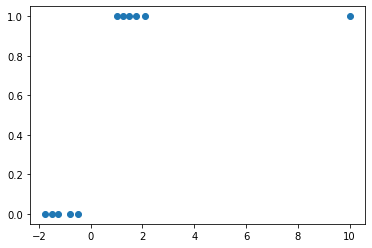

In [444]:
x = np.array([[1,1.5,1.25,2.1,1.75,-0.5,-0.78,-1.25,-1.5,-1.75,10]]).reshape(11,1) # input data
y = np.array([[1,1,1,1,1,0,0,0,0,0,1]]).reshape(11,1) # target
plt.scatter(x,y);

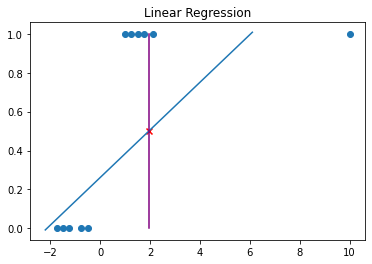

In [445]:
para = LR(x,y,-2.2,6.2);

จะเห็นได้ว่า จุดแบ่งถูกเลื่อนออกไปจนทำให้การทำนายผิดพลาด ถ้าดูจากผลลัพท์จะเห็นได้ว่า มีการทำนายผิดพลาดมากถึง 40%

In [446]:
#@title target compare with predicted
domain = np.array([[1]*len(x),x.T[0]]).T
result = np.dot(domain,para)
result = result.reshape(11,1)
result = np.array([list(map(int,result>0.5))])
pd.DataFrame({'Data':x.T[0],'Target':y.T[0],'Predicted':result[0]})

,Data,Target,Predicted
0,1.00,1,0
1,1.50,1,0
2,1.25,1,0
3,2.10,1,1
4,1.75,1,0
5,-0.50,0,0
6,-0.78,0,0
7,-1.25,0,0
8,-1.50,0,0
9,-1.75,0,0


นี่จึงเป็นเหตุผลที่เราใช้ Logistic Regression เพื่อให้ได้ผลลัพท์ที่ดีขึ้น <br>
ดังนั้นเรามาเริ่มกันเลยครับ


---

<br>
เริ่มกันกับข้อมูลใหม่


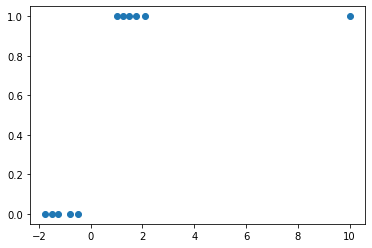

In [447]:
# x = np.array([[-20,10,0,10,2,-10,5,3,-4,1]]).reshape(10,1) # input data
# y = np.array([[0,1,0,1,1,0,1,1,0,1]]).reshape(10,1) # target

x = np.array([[1,1.5,1.25,2.1,1.75,-0.5,-0.78,-1.25,-1.5,-1.75,10]]).reshape(11,1) # input data
y = np.array([[1,1,1,1,1,0,0,0,0,0,1]]).reshape(11,1) # target

plt.scatter(x,y);

ในการทำ Logistic Regression นั้น จะมีสิ่งที่แตกต่างจาก การทำ Linear Regression อยู่ 2 อย่าง <br><br>
1.hypothesis function <br>
2.cost function <br><br>
ซึ่งตัว hypothesis function ของ Logistic Regression จะเพิ่ม sigmoid function เข้ามา <br><br>
\begin{equation}
\sigma(z) = \frac{1}{1 + e^{-z}}
\end{equation}
<br>
จะได้ hypothesis functionn เป็น
<br><br>
\begin{equation}
h_{\theta}(x) = \sigma(\theta^Tx)
\end{equation}
<br>
หรือ
<br>
\begin{equation}
h_{\theta}(x) = \frac{1}{1 + e^{-\theta^Tx}}
\end{equation}
<br><br>
ซึ่งจากการที่ผลลัพท์ของ classification เป็น 0,1 นั้น ทำให้ผลลัพท์จาก hypothesis function $h_\theta(x)$ นั้นบอกได้ถึงความน่าจะเป็นของการที่จะได้ผลลัพท์ 1 และ $1- h_\theta(x)$ บอกถึงความน่าจะเป็นที่จะได้ผลลัพท์เป็น 0<br>
ซึ่งเราสามารถเขียนออกมาได้เป็น <br>
\begin{equation}
h_{\theta}(x) = P(y=i|x;\theta)
\end{equation}
<br><br>

In [0]:
def sigmoid(z): #sigmoid function
  return 1/(1+np.exp(-1*z))

def hypo(theta,x): #hypothesis function
  return sigmoid(np.dot(theta,x.T))

ในส่วนของ cost function ของ Logistic Regression นั้นจะไม่เหมือนกับใน Linear Regression คือ Cross-Entropy โดยจะมี function เป็น <br><br>
\begin{equation}
J(\theta) = -\frac{1}{m}\sum^m_{i=1}[y^{(i)}log(h_\theta(x^{(i)}))+(1-y^{(i)})log(1-h_\theta(x^{(i)}))]
\end{equation}
<br>
หรือ เมื่อ Vectorized 
<br><br>
\begin{equation}
J(\theta) = -\frac{1}{m}[y^{T}log(h_\theta(x))+(1-y^{T})log(1-h_\theta(x))]
\end{equation}
<br><br>
ในส่วนของ Gradient Descent Algorithm เมื่อใช้ cost function ใหม่ จะได้เป็น<br>
>$repeat\;until\;convergence$ {<br>
\begin{equation}
\theta_j := \theta_j - \frac{\alpha}{m}\sum^m_{i=1}(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_j
\end{equation}
>}

หรือ เมื่อ Vectorized
>$repeat\;until\;convergence$ {<br>
\begin{equation}
\theta_j := \theta_j - \frac{\alpha}{m}x^T(\sigma(\theta^Tx)-\overrightarrow{y})
\end{equation}
>}<br>

จะเห็นได้ว่าสมการในการ update parameter นั้นจะเหมือนกับสมการของ linear regression เนื่องจากเมื่อทำ partial differentiate กับ cost function ของ logistic regression นั้นจะได้ผลลัพท์เหมือนกับของ linear regression 

In [0]:
def cost(theta,x,y): #cost function
  m = len(x)
  h = hypo(theta,x)
  return (1/m)*(-np.dot(y.T,np.log(h).T)-np.dot((1-y.T),np.log(1-h).T))

def GD(theta,x,y,alpha): #Gradient Descent
  m = len(x)
  upd = (alpha/m)*np.dot(x.T,(hypo(theta,x).T - y))
  return theta - upd

กำหนด initial $\theta$ เป็น 0<br>
กำหนด learning rate $\alpha$ เป็น 0.01


In [0]:
theta = np.array([[0]]) # initial theta
alpha = 0.01 # learning rate

ทำการ update parameter

In [0]:
J = cost(theta,x,y)+1
while J-cost(theta,x,y)>0.001: # updating until cost difference(epsilon) <0.001
  J = cost(theta,x,y)
  theta = GD(theta,x,y,alpha)
print('theta is ',theta)

เมื่อมาลอง plot ดูจะพบว่าผลลัพท์ที่ได้มีความแม่นยำมากขึ้น<br>

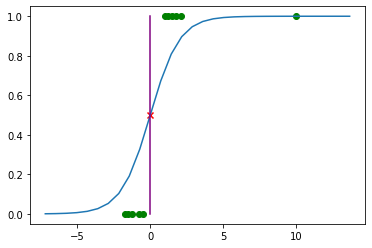

In [468]:
ran = np.array([range(-10,20)]).T;
plt.scatter(x,y,c='green');
plt.scatter(0,sigmoid(theta*0),marker='x',c='red');
plt.plot(np.dot(theta,ran.T)[0],hypo(theta,ran)[0]);
plt.plot([0,0],[0,1],'purple');

และลองเปรียบเทียบผลลัพท์จากการทำนาย กับ เป้าหมาย 

In [466]:
z = hypo(theta,x)[0]
pd.DataFrame({'Data':x.T[0], 'Target':y.T[0],'Predicted':list(map(int,(z>0.5)))}) # result

,Data,Target,Predicted
0,1.00,1,1
1,1.50,1,1
2,1.25,1,1
3,2.10,1,1
4,1.75,1,1
5,-0.50,0,0
6,-0.78,0,0
7,-1.25,0,0
8,-1.50,0,0
9,-1.75,0,0
